In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('../../nonresonant_ttbar/CMS_mtt/pp2tt_formFactors_scan.pcl')

### Plot limit on yDM

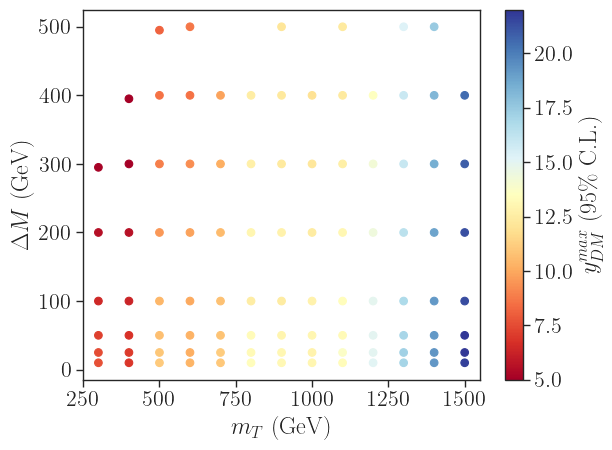

In [10]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

### Interpolate for a denser grid

In [16]:
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([10.,12.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

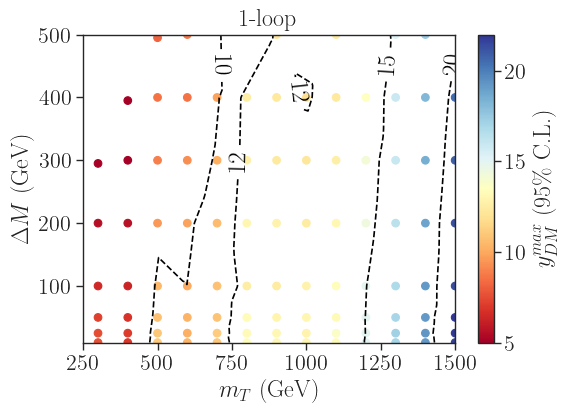

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

In [22]:
recastData[recastData['mST'] ==600.][['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
21,600.0,100.0,8.714231
22,600.0,200.0,8.541772
23,600.0,300.0,9.283159
24,600.0,400.0,9.838590
25,600.0,500.0,10.006764
26,600.0,550.0,10.251057
27,600.0,575.0,10.164134
28,600.0,590.0,10.329546


In [29]:
sorted(dm.unique())

[10.0, 25.0, 50.0, 100.0, 200.0, 295.0, 300.0, 395.0, 400.0, 495.0, 500.0]

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=10,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

### Save contour curves to text files

In [6]:
fname = 'CMS_mtt_oneLoop_contours.csv'
saveContours(contoursDict,fname,header='mST_GeV,deltaM_GeV')


Contours saved to CMS_mtt_oneLoop_contours.csv
